In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
d_1 = pd.read_csv('/Users/nishishareddybokka/Desktop/ML/datasets/winequality-red.csv')
print(d_1.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [236]:
v_missing = d_1.isnull().sum()
print("Missing values in each column:\n", v_missing)


Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [237]:
X_train, X_test, y_train, y_test = X.iloc[:split_index], X.iloc[split_index:], y.iloc[:split_index], y.iloc[split_index:]
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape, "X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_train shape: (266, 11) y_train shape: (266,) X_test shape: (1333, 11) y_test shape: (1333,)


In [238]:
X = d_1.drop(columns=['pH'])
y = d_1['pH']

t_size = 0.2

np.random.seed(42)

t_indices = np.random.choice(len(X), int(len(X) * t_size), replace=False)

X_train = X.drop(t_indices)
y_train = y.drop(t_indices)
X_test = X.iloc[t_indices]
y_test = y.iloc[t_indices]

X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

d = np.linalg.pinv(X_train.T.dot(X_train))
w = d.dot(X_train.T).dot(y_train)

n = X_test.dot(w)
print(w)

mean_squared_error = ((y_test - n) ** 2).mean()
print("Mean Squared Error (MSE):", mean_squared_error)



[-5.97832770e+01 -9.49155301e-02  4.70756115e-03 -3.22172410e-02
 -2.56187711e-02 -4.60537274e-01  1.67939155e-03 -7.59317286e-04
  6.35348369e+01 -8.52521799e-02  7.38921444e-02 -6.61925112e-03]
Mean Squared Error (MSE): 0.00687043308718354


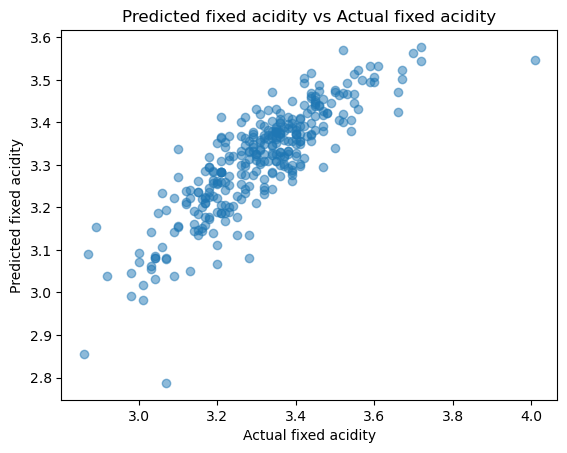

In [239]:
plt.scatter(y_test, n, alpha=0.5)
plt.xlabel("Actual fixed acidity")
plt.ylabel("Predicted fixed acidity")
plt.title("Predicted fixed acidity vs Actual fixed acidity")
plt.show()

In [240]:
import pandas as pd
import numpy as np

In [241]:
d_2 = pd.read_csv('/Users/nishishareddybokka/Desktop/ML/datasets/penguins.csv')
print(d_2.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [242]:
d_2 = d_2.dropna()

In [243]:
def e_column(column):
    u_values = column.unique()
    e = {value: index for index, value in enumerate(u_values)}
    return column.map(e)

d_2['species'] = e_column(data['species'])
d_2['island'] = e_column(data['island'])
d_2['sex'] = e_column(data['sex'])

print(d_2['species'].value_counts())


species
0    146
1    119
2     68
Name: count, dtype: int64


In [244]:
def s_column(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

d_2['species'] = s_column(d_2['species'])
d_2['island'] = s_column(d_2['island'])
d_2['bill_length_mm'] = s_column(d_2['bill_length_mm'])
d_2['bill_depth_mm'] = s_column(d_2['bill_depth_mm'])
d_2['flipper_length_mm'] = s_column(d_2['flipper_length_mm'])
d_2['body_mass_g'] = s_column(d_2['body_mass_g'])
print(d_2.head())
y = d_2['sex']  
X = d_2.drop(columns=['sex','year'])  
print(X)

s_ratio = 0.8
s_index = int(s_ratio * len(X))
X_train, X_test = X[:s_index], X[s_index:]
y_train, y_test = y[:s_index], y[s_index:]
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

    species    island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0 -0.997325 -1.811311       -0.894695       0.779559          -1.424608   
1 -0.997325 -1.811311       -0.821552       0.119404          -1.067867   
2 -0.997325 -1.811311       -0.675264       0.424091          -0.425733   
4 -0.997325 -1.811311       -1.333559       1.084246          -0.568429   
5 -0.997325 -1.811311       -0.858123       1.744400          -0.782474   

   body_mass_g  sex  year  
0    -0.567621    0  2007  
1    -0.505525    1  2007  
2    -1.188572    1  2007  
4    -0.940192    1  2007  
5    -0.691811    0  2007  
      species    island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   -0.997325 -1.811311       -0.894695       0.779559          -1.424608   
1   -0.997325 -1.811311       -0.821552       0.119404          -1.067867   
2   -0.997325 -1.811311       -0.675264       0.424091          -0.425733   
4   -0.997325 -1.811311       -1.333559       1.084246          -0.568429

In [429]:
class LogisticRegression:
    def __init__(self):
        pass
        self.loss = []

    def sigmoid(self, z):
        x = 1 / (1 + np.exp(-z))
        return x
    def cost(self, y, y_pred):
        epsilon = 1e-15 
        s = len(y)
        return - (1 / s) * (np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon)))


    def fit(self, X, y,learning_rate, iterations):
        self.theta = np.zeros(X.shape[1])
        s = len(y)

        for _ in range(iterations):
            n = np.dot(X, self.theta)
            i = self.sigmoid(n)
            grad = np.dot(X.T, (i - y)) / s
            self.theta -= learning_rate * grad 
            error = - (y * np.log(i) + (1 - y) * np.log(1 - i))
            loss = error.mean()
            self.loss.append(loss)
            
    def predict(self, X):
        print(self.theta)
        n = np.dot(X, self.theta)
        i = self.sigmoid(n)
        return (i >= 0.5).astype(int)

In [538]:
l_rate = 0.00001
ite = 1000
model = LogisticRegression()
model.fit(X_train, y_train,l_rate, ite)

In [539]:
y_pred = model.predict(X_test)

[ 1.54767284e-05 -1.53156692e-05 -1.60890502e-03 -1.78308845e-03
 -1.22909822e-03 -2.34051794e-03]


In [540]:
accur = np.mean(y_pred == y_test)
print("Accuracy:", accur)

Accuracy: 0.8656716417910447


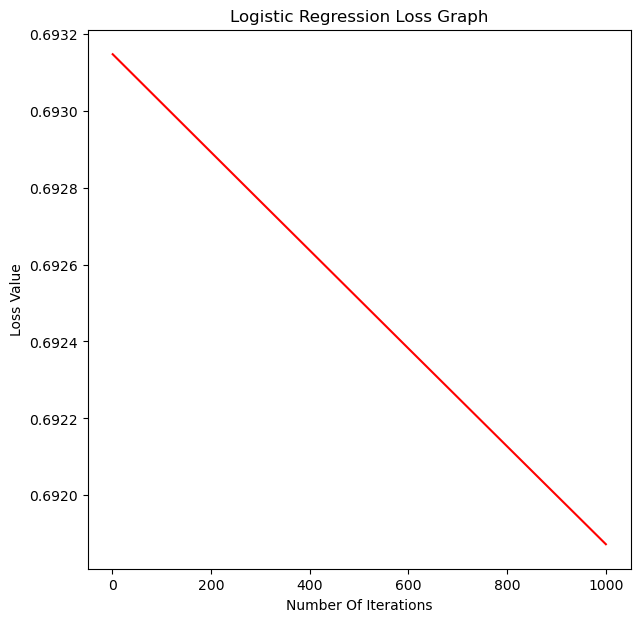

In [541]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.plot(range(1, ite + 1), model.loss, color='red')
plt.xlabel('Number Of Iterations')
plt.ylabel('Loss Value')
plt.title('Logistic Regression Loss Graph')
plt.show()


In [542]:
l_rate = 0.01
ite = 1000
model = LogisticRegression()
model.fit(X_train, y_train,l_rate, ite)

In [543]:
y_pred = model.predict(X_test)

[ 0.33915719 -0.04951998 -0.54627336 -1.26383206 -0.23920435 -0.99553321]


In [544]:
accur = np.mean(y_pred == y_test)
print("Accuracy:", accur)

Accuracy: 0.8955223880597015


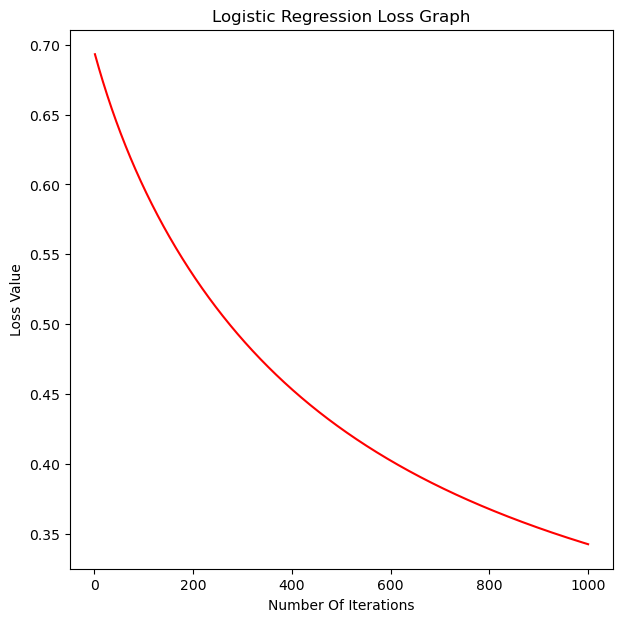

In [545]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.plot(range(1, ite + 1), model.loss, color='red')
plt.xlabel('Number Of Iterations')
plt.ylabel('Loss Value')
plt.title('Logistic Regression Loss Graph')
plt.show()


In [550]:
l_rate = 0.0001
ite = 5000
model = LogisticRegression()
model.fit(X_train, y_train,l_rate, ite)

In [551]:
y_pred = model.predict(X_test)

[ 0.00587432 -0.00128684 -0.07063779 -0.09125059 -0.05120128 -0.1057366 ]


In [552]:
accur = np.mean(y_pred == y_test)
print("Accuracy:", accur)

Accuracy: 0.8656716417910447


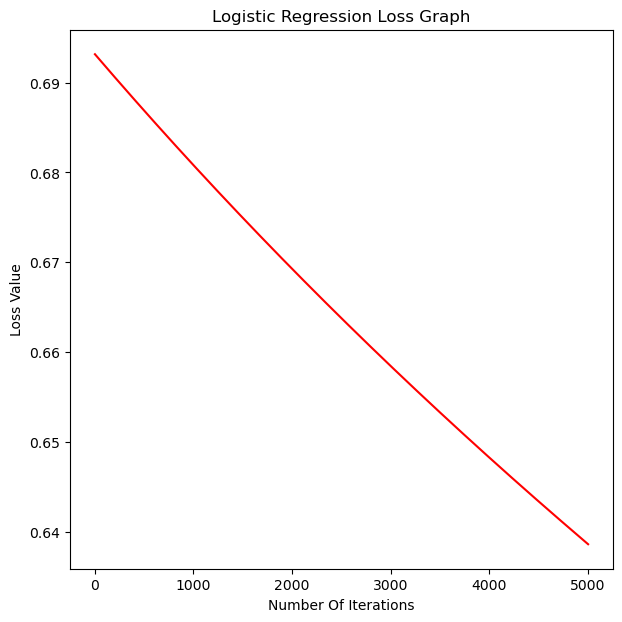

In [553]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.plot(range(1, ite + 1), model.loss, color='red')
plt.xlabel('Number Of Iterations')
plt.ylabel('Loss Value')
plt.title('Logistic Regression Loss Graph')
plt.show()
